# Author Info
---
Name: **Ejaz-ur-Rehman**\
Business Unit Head | Data Analyst\
MBA (Accounting & Finance), MS (Finance)\
Crystal Tech (Project of MUZHAB Group)\
Karachi, Pakistan

![Date](https://img.shields.io/badge/Date-23--April--2025-green?logo=google-calendar)
[![Email](https://img.shields.io/badge/Email-ijazfinance%40gmail.com-blue?logo=gmail)](mailto:ijazfinance@gmail.com)
[![LinkedIn](https://img.shields.io/badge/LinkedIn-Ejaz--ur--Rehman-blue?logo=linkedin)](https://www.linkedin.com/in/ejaz-ur-rehman/)
[![GitHub](https://img.shields.io/badge/GitHub-ejazurrehman-black?logo=github)](https://github.com/ejazurrehman)

# Net Migration Project South Asia
---

## Data Span
---
- We get Net Migration data from 1690 to 2024 for both Pakistan, Afghanistan, India, Bangladesh and Sri Lanka. 
  - The data includes annual figures, allowing for a detailed analysis of migration trends over the years.
  - The data is sourced from the World Bank, ensuring its reliability and accuracy.
  
## Net Migration:
> 
>  Net Migration is the difference between the number of people entering a country (immigrants) and the number of people leaving the country (emigrants) over a specific period of time.
> 
> Formula:
$$
\text{Net Migration} = \text{Immigrants} - \text{Emigrants}
$$
>
> Explanation:
  - If the result is 'positive', more people are entering the country than leaving (net in-migration).
  - If the result is 'negative', more people are leaving the country than entering (net out-migration).

## Net Migration Rate:
$$
\text{Net Migration Rate} = \left( \frac{\text{Immigrants} - \text{Emigrants}}{\text{Total Population}} \right) \times 1000
$$



In [12]:
# Import liabraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [13]:
# load the dataset
df = pd.read_csv('./data_set/data_net_migration.csv')
df.head()

,Years,Pakistan,India
0,1960,0,146955
1,1961,-66991,295177
2,1962,-65780,-70514
3,1963,-64552,21640
4,1964,-63298,-141916


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65 entries, 0 to 64
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Years     65 non-null     int64
 1   Pakistan  65 non-null     int64
 2   India     65 non-null     int64
dtypes: int64(3)
memory usage: 1.7 KB


In [15]:
pip install wbdata pandas


Note: you may need to restart the kernel to use updated packages.


- We don't have the data for Populaiton of Pakistan and India. We will get the populaito data from world bank API.
- Further, we will add with Net Migration data set too for the analysis of demographic trends.

In [16]:
import wbdata
import pandas as pd

# Country codes for Pakistan and India
countries = ["PAK", "IND"]

# Indicators: Population and Net Migration
indicators = {
    "SP.POP.TOTL": "total_population",
    "SM.POP.NETM": "net_migration",
}

# Download data
df = wbdata.get_dataframe(indicators, country=countries)

# Reset index to work with columns
df = df.reset_index()

# Convert 'date' to datetime format
df['date'] = pd.to_datetime(df['date'], errors='coerce')

# Extract only the year (no need for full date)
df['year'] = df['date'].dt.year

# Filter data from 1960 to 2024
df = df[(df['year'] >= 1960) & (df['year'] <= 2024)]

# Pivot to make data more readable
df_pivot = df.pivot_table(index="year", columns=["country"], values=["total_population", "net_migration"])
df_pivot = df_pivot.sort_index()

# Save the combined data
df_pivot.to_csv("./data_set/indo_pak_total_pop_net_migration.csv")
df_pivot.head()



net_migration          total_population            
country         India Pakistan            India    Pakistan
year                                                       
1960         146955.0      0.0      435990338.0  45709310.0
1961         295177.0 -66991.0      446564729.0  46921277.0
1962         -70514.0 -65780.0      457283090.0  48156128.0
1963          21640.0 -64552.0      468138575.0  49447776.0
1964        -141916.0 -63298.0      479229598.0  50799999.0

In [17]:
df = df_pivot.copy()

In [18]:
df.info()

<class 'wbdata.client.DataFrame'>
Index: 65 entries, 1960 to 2024
Data columns (total 4 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   (net_migration, India)        65 non-null     float64
 1   (net_migration, Pakistan)     65 non-null     float64
 2   (total_population, India)     65 non-null     float64
 3   (total_population, Pakistan)  65 non-null     float64
dtypes: float64(4)
memory usage: 2.3 KB


In [19]:
import wbdata
import pandas as pd

# Country codes
countries = ["PAK", "IND"]

# Indicators
indicators = {
    "SP.POP.TOTL": "total_population",
    "SM.POP.NETM": "net_migration"
}

# Download data
df = wbdata.get_dataframe(indicators, country=countries)

# Reset index
df = df.reset_index()

# Convert date to datetime, then extract year
df['date'] = pd.to_datetime(df['date'], errors='coerce')
df['Year'] = df['date'].dt.year

# Rename columns for consistency
df = df.rename(columns={'country': 'Country'})

# Keep only the necessary columns in the right order
df_cleaned = df[['Country', 'Year', 'total_population', 'net_migration']]

# Filter data between 1960 and 2024
df_cleaned = df_cleaned[(df_cleaned['Year'] >= 1960) & (df_cleaned['Year'] <= 2024)]

# Optional: Sort the data for better readability
df_cleaned = df_cleaned.sort_values(by=['Country', 'Year'])

# Save to CSV
df_cleaned.to_csv("./data_set/population_netmigration.csv", index=False)
df_cleaned.head()



,Country,Year,total_population,net_migration
64,India,1960,435990338.0,146955.0
63,India,1961,446564729.0,295177.0
62,India,1962,457283090.0,-70514.0
61,India,1963,468138575.0,21640.0
60,India,1964,479229598.0,-141916.0


- Here, we are taking the data for South Asia, include Pakistan, India, Bangladesh, Sri Lanka and Afghanistan.
- These countries are characterized by diverse cultures, languages, and economic conditions.
- The data set created via World Bank API for the reliability.

In [20]:
import wbdata
import pandas as pd

# Country codes for: Pakistan, India, Bangladesh, Sri Lanka, Afghanistan
countries = ["PAK", "IND", "BGD", "LKA", "AFG"]

# Indicators: Total Population and Net Migration
indicators = {
    "SP.POP.TOTL": "total_population",
    "SM.POP.NETM": "net_migration"
}

# Download data
df = wbdata.get_dataframe(indicators, country=countries)

# Reset index to access columns
df = df.reset_index()

# Convert date to datetime and extract the year
df['date'] = pd.to_datetime(df['date'], errors='coerce')
df['Year'] = df['date'].dt.year

# Rename country column
df = df.rename(columns={'country': 'Country'})

# Select and reorder necessary columns
df_cleaned = df[['Country', 'Year', 'total_population', 'net_migration']]

# Filter years 1960 to 2024
df_cleaned = df_cleaned[(df_cleaned['Year'] >= 1960) & (df_cleaned['Year'] <= 2024)]

# Sort by country and year for readability
df_cleaned = df_cleaned.sort_values(by=['Country', 'Year'])

# Save the final data to a CSV file
df_cleaned.to_csv("./data_set/population_netmigration_south_asia.csv", index=False)
df_cleaned.head()


,Country,Year,total_population,net_migration
64,Afghanistan,1960,9035043.0,2606.0
63,Afghanistan,1961,9214083.0,6109.0
62,Afghanistan,1962,9404406.0,7016.0
61,Afghanistan,1963,9604487.0,6681.0
60,Afghanistan,1964,9814318.0,7079.0


In [21]:
df = df_cleaned.copy()

In [22]:
df.info()

<class 'wbdata.client.DataFrame'>
Index: 325 entries, 64 to 195
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Country           325 non-null    object 
 1   Year              325 non-null    int32  
 2   total_population  325 non-null    float64
 3   net_migration     325 non-null    float64
dtypes: float64(2), int32(1), object(1)
memory usage: 11.4+ KB


In [23]:
df['Country'].unique()

array(['Afghanistan', 'Bangladesh', 'India', 'Pakistan', 'Sri Lanka'],
      dtype=object)

In [24]:
df['Country'].value_counts()

Country
Afghanistan    65
Bangladesh     65
India          65
Pakistan       65
Sri Lanka      65
Name: count, dtype: int64

In [25]:
df['Year'].unique()

array([1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970,
       1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981,
       1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992,
       1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003,
       2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014,
       2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024],
      dtype=int32)

In [26]:
df[['total_population','net_migration']].describe()

,total_population,net_migration
count,3.250000e+02,3.250000e+02
mean,2.407603e+08,-2.267304e+05
std,3.737676e+08,4.769833e+05
min,9.035043e+06,-2.290411e+06
25%,1.980575e+07,-3.421770e+05
50%,7.583935e+07,-6.699100e+04
75%,1.894991e+08,8.800000e+02
max,1.450936e+09,1.197329e+06


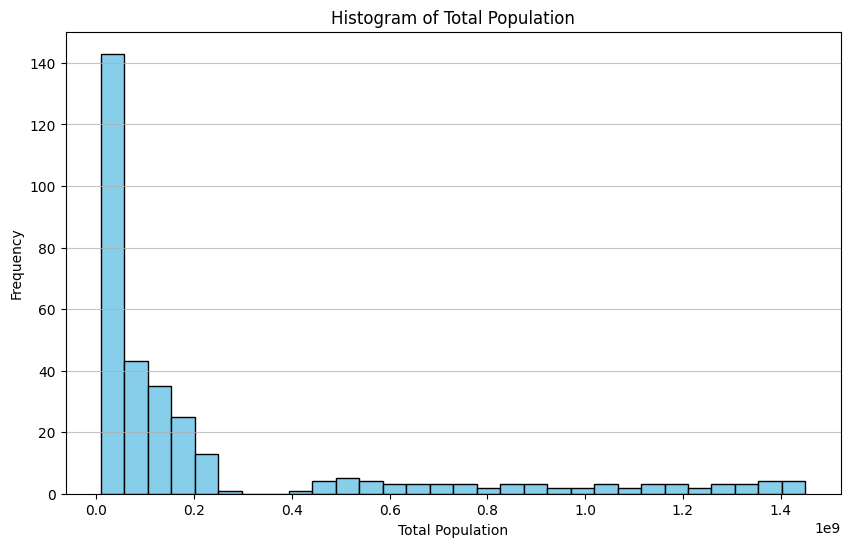

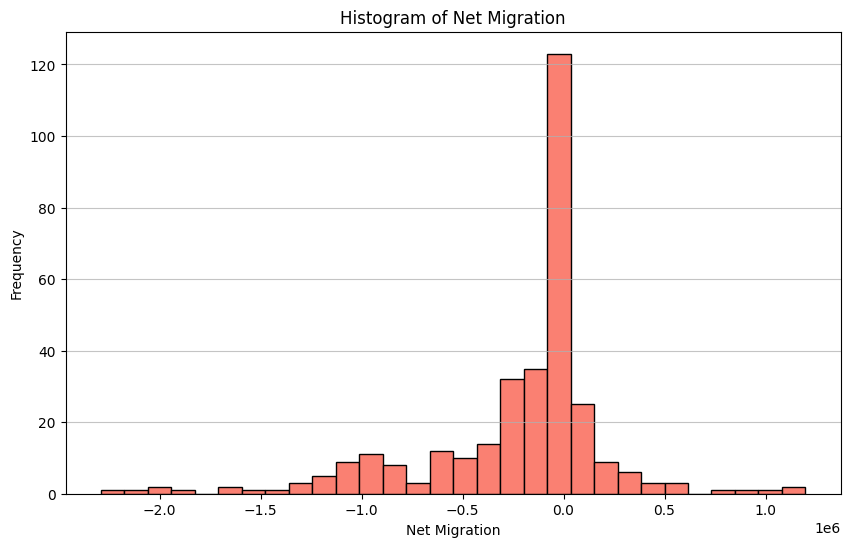

In [27]:
# Histogram of Total Population
plt.figure(figsize=(10, 6))
plt.hist(df['total_population'], bins=30, color='skyblue', edgecolor='black')
plt.title('Histogram of Total Population')
plt.xlabel('Total Population')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()
# Histogram of Net Migration
plt.figure(figsize=(10, 6))
plt.hist(df['net_migration'], bins=30, color='salmon', edgecolor='black')
plt.title('Histogram of Net Migration')
plt.xlabel('Net Migration')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

In [28]:
# Line plot using years as x-axis and total population as y-axis
fig = px.line(df, x='Year', y='total_population', color='Country',
                 title='Total Population Over Years in South Asia',
                 labels={'total_population': 'Total Population', 'Year': 'Year'})
fig.update_traces(mode='lines+markers')
fig.update_layout(title_x=0.5, xaxis_title='Year', yaxis_title='Total Population')
fig.show()

In [29]:
# Line plot using years as x-axis and total population as y-axis

fig = px.line(df, x='Year', y='total_population', color='Country',
                    facet_col='Country',
                 title='Total Population Over Years in South Asia',
                 labels={'total_population': 'Total Population', 'Year': 'Year'})
fig.update_layout(title_x=0.5, xaxis_title='Year', yaxis_title='Total Population')
fig.show()

In [30]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Get unique countries from dataframe
countries = df['Country'].unique()

# Create 5 subplots in 3 rows and 2 columns
fig = make_subplots(rows=3, cols=2, 
                    subplot_titles=countries,
                    shared_xaxes=True,
                    shared_yaxes=False,
                    vertical_spacing=0.1,
                    horizontal_spacing=0.1)

# Row and column tracker
row_col_map = [(1, 1), (1, 2), (2, 1), (2, 2), (3, 1)]

# Add traces for each country
for i, country in enumerate(countries):
    row, col = row_col_map[i]
    country_data = df[df['Country'] == country]
    fig.add_trace(
        go.Scatter(x=country_data['Year'], y=country_data['total_population'], name=country, mode='lines'),
        row=row, col=col
    )

# Update layout
fig.update_layout(
    height=900,
    width=1000,
    title_text="Total Population Over Years in South Asia",
    title_x=0.5,
    showlegend=False
)

# Axis labels
fig.update_xaxes(title_text="Year", row=3, col=1)
fig.update_yaxes(title_text="Total Population", row=2, col=1)

fig.show()


In [31]:
# scatter plot using plotly express
fig = px.scatter(df, x='total_population', y='net_migration', color='Country',
                 title='Total Population vs Net Migration in South Asia',
                 labels={'total_population': 'Total Population', 'net_migration': 'Net Migration'})
fig.update_traces(marker=dict(size=10, line=dict(width=2, color='DarkSlateGrey')))
fig.update_layout(title_x=0.5, xaxis_title='Total Population', yaxis_title='Net Migration')
fig.show()

In [32]:
# scatter plot using plotly express
fig = px.scatter(df, x='total_population', y='net_migration', color='Country',
                 animation_frame='Year',
                 title='Total Population vs Net Migration in South Asia',
                 labels={'total_population': 'Total Population', 'net_migration': 'Net Migration'})
fig.update_traces(marker=dict(size=10, line=dict(width=2, color='DarkSlateGrey')))
fig.update_layout(title_x=0.5, xaxis_title='Total Population', yaxis_title='Net Migration')
fig.show()

In [33]:
# Line plot of Net Migration Over Years
fig = px.line(df, x='Year', y='net_migration', color='Country',
                 title='Net Migration Over Years in South Asia',
                 labels={'net_migration': 'Net Migration', 'Year': 'Year'})
fig.update_traces(mode='lines+markers')
fig.update_layout(title_x=0.5, xaxis_title='Year', yaxis_title='Net Migration')
fig.show()

In [34]:
# Sort by country and year for correct difference calculation
df = df.sort_values(by=['Country', 'Year'])

# Calculate population change by year
df['population_change'] = df.groupby('Country')['total_population'].diff()

# Calculate emigrants ≈ population change - net migration
df['emigrants'] = df['population_change'] - df['net_migration']

# Optional: Drop NA from first year where diff() returns NaN
df = df.dropna(subset=['emigrants'])

# Round for readability
df['emigrants'] = df['emigrants'].round(0)




In [35]:
import plotly.express as px

fig = px.line(
    df, 
    x='Year', 
    y='emigrants', 
    color='Country',
    facet_col='Country',
    facet_col_wrap=2,  # 2 columns → 3 rows for 5 countries
    title='Estimated Emigrants Over Years in South Asia',
    labels={'emigrants': 'Estimated Emigrants', 'Year': 'Year'}
)

fig.update_layout(
    title_x=0.5,
    xaxis_title='Year',
    yaxis_title='Estimated Emigrants'
)

fig.show()


In [36]:
# Group by Country and Year, then sum net migration
net_mig_by_country = df.groupby(['Country', 'Year'], as_index=False)['net_migration'].sum()

# Sort values by Year for correct plotting
net_mig_by_country = net_mig_by_country.sort_values(by=['Country', 'Year'])

# Plot line chart
import plotly.express as px

fig = px.line(
    net_mig_by_country,
    x='Year',
    y='net_migration',
    color='Country',
    title='Net Migration Over Years by Country (Total)',
    labels={'net_migration': 'Net Migration', 'Year': 'Year'}
)

fig.update_layout(title_x=0.5, xaxis_title='Year', yaxis_title='Net Migration')
fig.show()


In [37]:
import plotly.express as px

fig = px.bar(
    net_mig_by_country,
    x='Year',
    y='net_migration',
    color='Country',
    barmode='group',
    title='Net Migration Over Years by Country (Bar Plot)',
    labels={'net_migration': 'Net Migration', 'Year': 'Year'}
)

fig.update_layout(title_x=0.5, xaxis_title='Year', yaxis_title='Net Migration')
fig.show()
